-0.10017332779999999
2.6848156007523407
Optimization terminated successfully.
         Current function value: 0.200357
         Iterations 8
-0.09453105639999997
2.451187819732103
Optimization terminated successfully.
         Current function value: 0.181216
         Iterations 9
-0.07780385530000002
2.2249218834854596
Optimization terminated successfully.
         Current function value: 0.155911
         Iterations 10
-0.07516588649999997
2.025948619175545
Optimization terminated successfully.
         Current function value: 0.132251
         Iterations 9
-0.09221476349999995
2.6907695093507447
Optimization terminated successfully.
         Current function value: 0.192328
         Iterations 8
-0.07916816900000001
2.4524772174432137
Optimization terminated successfully.
         Current function value: 0.168220
         Iterations 9
-0.07351946649999998
2.226169046306445
Optimization terminated successfully.
         Current function value: 0.148388
         Iterations 9
-0.07888

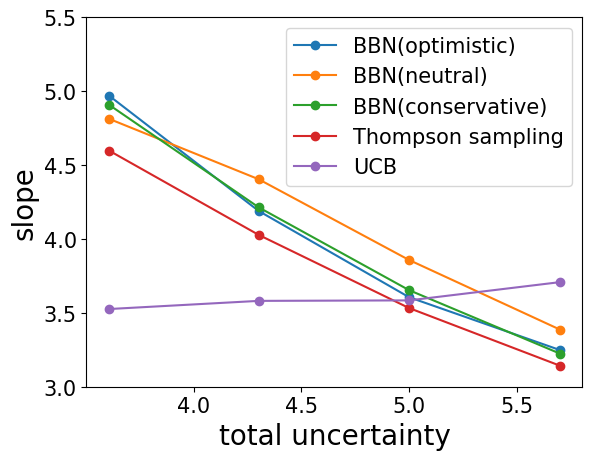

In [1]:

import pandas as pd
import numpy as np
from statsmodels.discrete.discrete_model import Probit
from statsmodels.regression.mixed_linear_model import MixedLM
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
plt.style.use('default')
def standardization(data):
    data = np.array(data)
    mu = np.mean(data, axis=0)
    print(mu)
    sigma = np.std(data, axis=0)
    print(sigma)
    return (data ) / (sigma + 1e-9)


if __name__ == '__main__':
    std_list = [4.5,4,3.5,3]
    RU = 1
    modes = ['seeking','neu','averse', 'TS', 'UCB']
    labels = ['BBN(optimistic)','BBN(neutral)','BBN(conservative)', 'Thompson sampling', 'UCB']
    for id,mode in enumerate(modes):
        b_list = []
        b_std_list = []
        w_list = []
        w_std_list = []
        TU_list = []
        for (index,r1_std) in enumerate(std_list):
            r1_std = r1_std
            r2_std = r1_std - RU
            TU = np.sqrt(r1_std **2 + r2_std ** 2)
            TU_list.append(TU)
            if mode in ['seeking','neu','averse']:
                Data = pd.read_csv(f'saved/analysed_data_seek_init_std={r1_std}_RU={RU}_RS_5_6_'+mode+'.csv')
                Data = Data[(Data.trial > 10) & (Data.trial <= 20)]
            if mode == 'TS':
                Data = pd.read_csv(f'saved/TS_std={r1_std}_RU={RU}_1.csv')
                Data = Data[(Data.trial > 10) & (Data.trial <= 20)]
                # Data = Data[Data.trial > 1]
            if mode == 'UCB':
                Data = pd.read_csv(f'saved/UCB_std={r1_std}_RU={RU}_1.csv')
                # Data = Data[Data.trial > 1]
                Data = Data[(Data.trial > 10) & (Data.trial <= 20)]
            # Data = Data[(Data.trial > 10) & (Data.trial <= 20)]
            Data['choice'] = Data['choice'].astype(bool)
            Data['choice'] = ~Data['choice']
            C_list = Data['choice'].tolist()
            Y = C_list
            V_list = (Data['Q1']-Data['Q2']).tolist()
            V_list = standardization(V_list)
            X = np.array(V_list).T
            X = pd.DataFrame(X, columns=['V'])
            X = sm.add_constant(X)
            model = Probit(Y, X)
            probit_model = model.fit()
            const = probit_model.params['const']
            v = probit_model.params['V']
            std_const = probit_model.params['const'] - probit_model.conf_int()[0]['const']
            std_v = probit_model.params['V'] - probit_model.conf_int()[0]['V']
            b_list.append(const)
            w_list.append(v)
            b_std_list.append(std_const)
            w_std_list.append(std_v)
            # print(probit_model.summary())
        plt.errorbar(TU_list, w_list,fmt="o-",elinewidth=2,capsize=4, label=labels[id])
        # plt.show()
        # plt.errorbar(RU_list, w_list,fmt="o-",elinewidth=2,capsize=4, label=mode)
        # plt.show()
    plt.xlabel('total uncertainty',size=20)
    plt.ylabel('slope',size=20)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.ylim(3,5.5)
    plt.legend(prop={'size': 15})
    plt.show()





